In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [4]:
d1=np.loadtxt("example_1.txt")
d2=np.loadtxt("example_2.txt")
print(d1.shape,d2.shape)

(500,) (500,)


# Historam plots

Text(0, 0.5, 'counts')

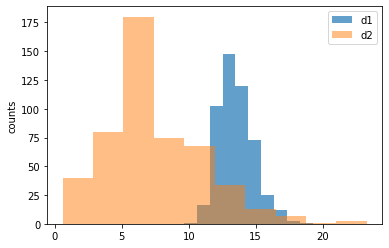

In [7]:

plt.hist(d1,label='d1',alpha=0.7);
plt.hist(d2,label='d2',alpha=0.5);
plt.legend()
plt.ylabel("counts")

Text(0, 0.5, 'counts')

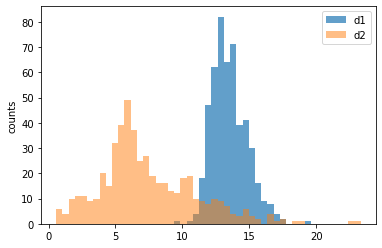

In [26]:
bins=np.linspace(min(d1.min(),d2.min()),max(d1.max(),d2.max()),50)
plt.hist(d1,label='d1',bins=bins,alpha=0.7);
plt.hist(d2,label='d2',bins=bins,alpha=0.5);
plt.legend()
plt.ylabel("counts")

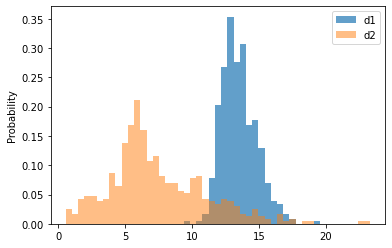

In [29]:
bins=np.linspace(min(d1.min(),d2.min()),max(d1.max(),d2.max()),50)
plt.hist(d1,label='d1',bins=bins,alpha=0.7,density=True);
plt.hist(d2,label='d2',bins=bins,alpha=0.5,density=True);
plt.legend()
plt.ylabel("Probability");

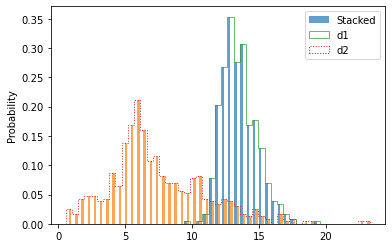

In [38]:
bins=np.linspace(min(d1.min(),d2.min()),max(d1.max(),d2.max()),50)
plt.hist([d1,d2],label='Stacked',bins=bins,alpha=0.7,density=True,lw=1);
plt.hist(d1,label='d1',bins=bins,alpha=0.7,density=True,histtype='step',lw=1);
plt.hist(d2,label='d2',bins=bins,alpha=1,density=True,histtype='step',ls=':',lw=1);
#ls-linestyle,lw- line width
plt.legend()
plt.ylabel("Probability");

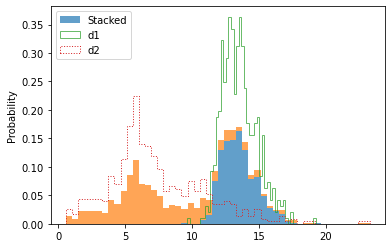

In [41]:
# when we dont to complicate calculating bins
bins=50
plt.hist([d1,d2],label='Stacked',bins=bins,alpha=0.7,histtype='barstacked',density=True,lw=1);
plt.hist(d1,label='d1',bins=bins,alpha=0.7,density=True,histtype='step',lw=1);
plt.hist(d2,label='d2',bins=bins,alpha=1,density=True,histtype='step',ls=':',lw=1);
#ls-linestyle,lw- line width
plt.legend()
plt.ylabel("Probability");

 # Bee swarm plots

In [53]:
dataset=pd.DataFrame({
    "value":np.concatenate((d1,d2)),
    "type":np.concatenate((np.ones(d1.shape),np.zeros(d2.shape)))
                     })

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


<AxesSubplot:>

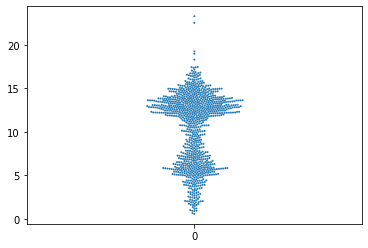

In [63]:
sb.swarmplot(data= dataset["value"],size=2)

<AxesSubplot:xlabel='type', ylabel='value'>

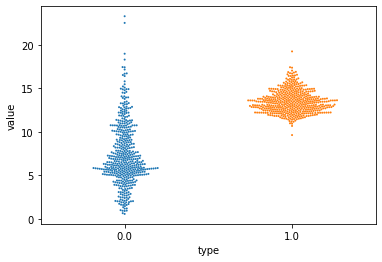

In [60]:
sb.swarmplot(x='type',y="value",data=dataset,size=2)
# Swarnplots like histograms lacks scientific rigour and can't be used in formal pesentation.Mostly used for getting an insight. 

In [67]:
#example how the numpy.concatenate works
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
#np.concatenate((a, b.T), axis=1)
#np.concatenate((a, b), axis=None)

array([[1, 2],
       [3, 4],
       [5, 6]])

# Boxplot

<AxesSubplot:xlabel='type', ylabel='value'>

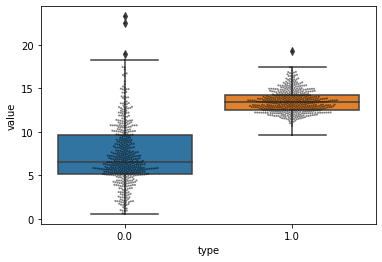

In [74]:
sb.boxplot(x='type',y='value',data=dataset,whis=2)
sb.swarmplot(x='type',y="value",data=dataset,size=2,color='k',alpha=0.5)
# 25% below the box, 25% above the box and line is @50% mark -Median
#How the outlier was calculated was 1.5 times the width of the box in seaborn,which cut shot hte long tail thus giving us the bunch of Outliers.
#whis to control the tail here.

# Violin plot

<AxesSubplot:xlabel='type', ylabel='value'>

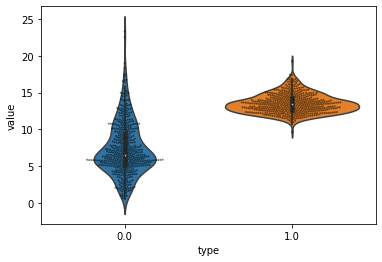

In [76]:
sb.violinplot(x='type',y='value',data=dataset,whis=2)
sb.swarmplot(x='type',y="value",data=dataset,size=2,color='k',alpha=0.5)


<AxesSubplot:xlabel='type', ylabel='value'>

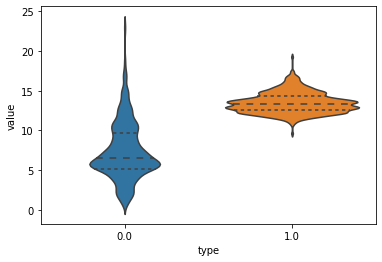

In [81]:
sb.violinplot(x='type',y='value',data=dataset,inner="quartile",bw=0.15)
#bw:bandwidth- amount of smoothening 

# Empirical cummulative Distribution

When we form a histogram the fact you have to bin data means that the looks can change significantly when you change bin sizing. And each bin has statistical uncertainty. You can get past that using a CDF. Its harder - visually - to see features in the PDF when looking at the CDF, however its generally more useful when you are trying to do quantitative comparisons between multiple distributions. We'll get on that later.


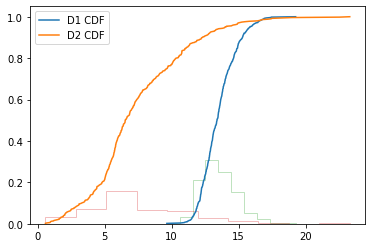

In [5]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)
cdf = np.linspace(1/d1.size, 1, d1.size)

plt.plot(sd1, cdf, label="D1 CDF")
plt.plot(sd2, cdf, label="D2 CDF")
plt.hist(d1, histtype="step", density=True, alpha=0.3)
plt.hist(d2, histtype="step", density=True, alpha=0.3)
plt.legend();

# Describe
If we don't want plots and just some numbers, you might be looking for pandas' `describe` function.

In [6]:
df = pd.DataFrame({"Data1": d1, "Data2": d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
